# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [212]:
# Download Library
%pip install pandas
%pip install openpyxl
%pip install scikit-learn
%pip install joblib
%pip install seaborn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.



In [213]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from joblib import Parallel, delayed
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Import Dataset

In [214]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
df.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,id
0,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,1
1,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,2
2,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,3
3,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,4
4,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,5


Train Dataset

In [215]:
#https://drive.google.com/file/d/1qTk4wuXE8NjOsqoEERFre9d9UwWtfOlf/view?usp=sharing
#https://drive.google.com/file/d/1lQnlxexMO5po0TFcOk5dp-tnkR_tswr9/view?usp=sharing
#https://drive.google.com/file/d/1S9niayLbd1AGFqSr7IK7oroKyQalFN63/view?usp=sharing
#https://drive.google.com/file/d/1W2EossQ9NWgzySeUFRqetvhOAKgpusnk/view?usp=sharing
#https://drive.google.com/file/d/18IzeH8Xn4MIRS9MKXJkTdEvif1GRStuw/view?usp=sharing
#https://drive.google.com/file/d/1-qmbqLwPzv3v2gdY4cdumGKV6J7q7P2w/view?usp=sharing

# time_features_train = pd.read_csv('https://drive.google.com/uc?id=1qTk4wuXE8NjOsqoEERFre9d9UwWtfOlf')
# labels_train = pd.read_csv('https://drive.google.com/uc?id=1lQnlxexMO5po0TFcOk5dp-tnkR_tswr9')
# flow_features_train = pd.read_csv('https://drive.google.com/uc?id=1S9niayLbd1AGFqSr7IK7oroKyQalFN63')
# content_features_train = pd.read_csv('https://drive.google.com/uc?id=1W2EossQ9NWgzySeUFRqetvhOAKgpusnk')
# basic_features_train = pd.read_csv('https://drive.google.com/uc?id=18IzeH8Xn4MIRS9MKXJkTdEvif1GRStuw')
# additional_features_train = pd.read_csv('https://drive.google.com/uc?id=1-qmbqLwPzv3v2gdY4cdumGKV6J7q7P2w')               

time_features_train = pd.read_csv("train/time_features_train.csv")  
labels_train = pd.read_csv('train/labels_train.csv')
flow_features_train = pd.read_csv('train/flow_features_train.csv')
content_features_train = pd.read_csv('train/content_features_train.csv')
basic_features_train = pd.read_csv('train/basic_features_train.csv')
additional_features_train = pd.read_csv('train/additional_features_train.csv')


In [216]:
print(time_features_train.head())
print(labels_train.head())
print(flow_features_train.head())
print(content_features_train.head())
print(basic_features_train.head())
print(additional_features_train.head())

          sjit         djit      sinpkt      dinpkt    tcprtt    synack  \
0  4449.110313  3234.831566   11.845558    6.261361       NaN  0.000444   
1     0.000000     0.000000    0.009000    0.000000  0.000000  0.000000   
2  8561.040438   249.950547  165.386453  172.345750  0.158826  0.057902   
3  4053.086020  2918.730804    8.669644    4.496707  0.000558  0.000448   
4     0.000000     0.000000    0.008000    0.007000  0.000000  0.000000   

     ackdat  id  
0  0.000114   0  
1       NaN   1  
2  0.100924   2  
3       NaN   3  
4  0.000000   4  
  attack_cat  label  id
0     Normal      0   0
1    Generic      1   1
2   Exploits      1   2
3     Normal      0   3
4     Normal      0   4
  proto  id
0   tcp   0
1   udp   1
2   tcp   2
3   tcp   3
4   udp   4
    swin   dwin         stcpb        dtcpb  smean   dmean  trans_depth  \
0  255.0  255.0  4.864839e+08  492604340.0   58.0     NaN          0.0   
1    0.0    0.0  0.000000e+00          0.0   57.0     0.0          0.0   
2  

Test Dataset

In [217]:
#https://drive.google.com/file/d/1Atr6sA2Tzc0D9L_bQM2_6KLYh332Iv0y/view?usp=sharing
#https://drive.google.com/file/d/1ePaWIPvDWCpEzrTChPy15t_F4BgotXmD/view?usp=sharing
#https://drive.google.com/file/d/1-EA1sY0DBnHcnQ0LOSZ_eVR6C0GC2eEd/view?usp=sharing
#https://drive.google.com/file/d/1Dc14IM0m16HRDXjy8aQ9JCAIfQhkPPvi/view?usp=sharing
#https://drive.google.com/file/d/1Y8hyL-xSee0KFwuXo9RORo430DTQ4bV7/view?usp=sharing


# time_features_test = pd.read_csv('https://drive.google.com/uc?id=1Atr6sA2Tzc0D9L_bQM2_6KLYh332Iv0y')
# flow_features_test = pd.read_csv('https://drive.google.com/uc?id=1ePaWIPvDWCpEzrTChPy15t_F4BgotXmD')
# content_features_test = pd.read_csv('https://drive.google.com/uc?id=1-EA1sY0DBnHcnQ0LOSZ_eVR6C0GC2eEd')
# basic_features_test = pd.read_csv('https://drive.google.com/uc?id=1Dc14IM0m16HRDXjy8aQ9JCAIfQhkPPvi')
# aditional_features_test = pd.read_csv('https://drive.google.com/uc?id=1Y8hyL-xSee0KFwuXo9RORo430DTQ4bV7')

time_features_test = pd.read_csv("test/time_features_test.csv")
flow_features_test = pd.read_csv('test/flow_features_test.csv')
content_features_test = pd.read_csv('test/content_features_test.csv')
basic_features_test = pd.read_csv('test/basic_features_test.csv')
aditional_features_test = pd.read_csv('test/additional_features_test.csv')

In [218]:
print(time_features_test.head())
print(flow_features_test.head())
print(content_features_test.head())
print(basic_features_test.head())
print(aditional_features_test.head())

          sjit        djit     sinpkt      dinpkt    tcprtt    synack  \
0  2737.954123  118.833969  48.756556   76.593602  0.165117  0.072001   
1  2938.299144  165.780563  49.812539  109.557602  0.223604  0.100248   
2  4287.453629  129.471406  69.765530   94.395906  0.113189  0.082498   
3     0.000000    0.000000   0.001000    0.000000  0.000000  0.000000   
4  1119.063538   26.748141  17.628799   15.543294  0.000655  0.000526   

     ackdat  id  
0  0.093116   0  
1  0.123356   1  
2  0.030691   2  
3  0.000000   3  
4  0.000129   4  
  proto  id
0   tcp   0
1   tcp   1
2   tcp   2
3   udp   3
4   tcp   4
    swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
0  255.0  255.0  2.914597e+08  3.441056e+09   53.0   45.0          0.0   
1  255.0  255.0  2.288130e+09  3.754733e+07  632.0   45.0          0.0   
2  255.0  255.0  2.901133e+09  1.323903e+09  215.0   54.0          0.0   
3    0.0    0.0  0.000000e+00           NaN    NaN    0.0          0.0   
4  255.0  2

In [219]:
merged_train_df = pd.merge(time_features_train, labels_train, on='id', how='outer')
merged_train_df = pd.merge(merged_train_df, flow_features_train, on='id', how='outer')
merged_train_df = pd.merge(merged_train_df, content_features_train, on='id', how='outer')
merged_train_df = pd.merge(merged_train_df, basic_features_train, on='id', how='outer')
merged_train_df = pd.merge(merged_train_df, additional_features_train, on='id', how='outer')

# merged_train_df.to_csv('merged_train_dataset.csv', index=False)
# merged_train_df.to_excel('merged_train_dataset.xlsx', index=False)

In [220]:
merged_test_df = pd.merge(flow_features_test, time_features_test, on='id', how='outer')
merged_test_df = pd.merge(merged_test_df, content_features_test, on='id', how='outer')
merged_test_df = pd.merge(merged_test_df, basic_features_test, on='id', how='outer')
merged_test_df = pd.merge(merged_test_df, aditional_features_test, on='id', how='outer')

# merged_test_df.to_csv('merged_test_dataset.csv', index=False)
# merged_test_df.to_excel('merged_test_dataset.xlsx', index=False)

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [221]:
def explore_data(data, dataset_name):
    print(f"Eksplorasi dataset {dataset_name}")
    print("="*50)
    
    print(f"Shape dataset: {data.shape}\n")
    
    print("Tipe-tipe feature")
    print(data.dtypes.value_counts(), "\n")
    
    print("Missing Values (Jumlah & Persentase):")
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(data)) * 100
    missing_summary = pd.DataFrame({
        "Missing Values": missing_values,
        "Persentase": missing_percentage
    })

    print(missing_summary[missing_summary["Missing Values"] > 0].sort_values(by="Persentase", ascending=False), "\n")
    
    print("Informasi Statistik:")
    print(data.describe().T, "\n")
    
    print("Nilai feature kategorikal: ")
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"{col}:")
        print(data[col].value_counts(), "\n")
    
    if "attack_cat" in data.columns:
        print("Distribusi variabel target: ")
        print(data["attack_cat"].value_counts(), "\n")

In [222]:
explore_data(merged_train_df, "Train")
explore_data(merged_test_df, "Test")

Eksplorasi dataset Train
Shape dataset: (175341, 44)

Tipe-tipe feature
float64    38
object      4
int64       2
Name: count, dtype: int64 

Missing Values (Jumlah & Persentase):
                   Missing Values  Persentase
dloss                        8978    5.120308
ct_dst_src_ltm               8895    5.072972
dbytes                       8869    5.058144
dmean                        8855    5.050159
ct_srv_src                   8851    5.047878
djit                         8846    5.045027
ct_ftp_cmd                   8842    5.042745
dload                        8837    5.039894
tcprtt                       8836    5.039323
proto                        8826    5.033620
sttl                         8825    5.033050
ct_src_ltm                   8823    5.031909
state                        8805    5.021644
dtcpb                        8803    5.020503
sloss                        8794    5.015370
service                      8791    5.013659
response_body_len            8791    5

In [223]:
for column in merged_train_df.columns:
    print(f"{column}, Tipe Data: {merged_train_df[column].dtype}")

sjit, Tipe Data: float64
djit, Tipe Data: float64
sinpkt, Tipe Data: float64
dinpkt, Tipe Data: float64
tcprtt, Tipe Data: float64
synack, Tipe Data: float64
ackdat, Tipe Data: float64
id, Tipe Data: int64
attack_cat, Tipe Data: object
label, Tipe Data: int64
proto, Tipe Data: object
swin, Tipe Data: float64
dwin, Tipe Data: float64
stcpb, Tipe Data: float64
dtcpb, Tipe Data: float64
smean, Tipe Data: float64
dmean, Tipe Data: float64
trans_depth, Tipe Data: float64
response_body_len, Tipe Data: float64
state, Tipe Data: object
dur, Tipe Data: float64
sbytes, Tipe Data: float64
dbytes, Tipe Data: float64
sttl, Tipe Data: float64
dttl, Tipe Data: float64
sloss, Tipe Data: float64
dloss, Tipe Data: float64
service, Tipe Data: object
sload, Tipe Data: float64
dload, Tipe Data: float64
spkts, Tipe Data: float64
dpkts, Tipe Data: float64
is_sm_ips_ports, Tipe Data: float64
ct_state_ttl, Tipe Data: float64
ct_flw_http_mthd, Tipe Data: float64
is_ftp_login, Tipe Data: float64
ct_ftp_cmd, Tipe

In [224]:
for column in merged_train_df.columns:
    if merged_train_df[column].dtype == 'object': 
        unique_values = merged_train_df[column].unique()
        print(f"Kolom : {column}, Unique Values: {unique_values}")
        print(f"Jumlah Unique Values: {len(unique_values)}")

Kolom : attack_cat, Unique Values: ['Normal' 'Generic' 'Exploits' 'Fuzzers' 'DoS' 'Reconnaissance' 'Analysis'
 'Backdoor' 'Shellcode' 'Worms']
Jumlah Unique Values: 10
Kolom : proto, Unique Values: ['tcp' 'udp' 'st2' 'unas' 'irtp' nan 'vmtp' 'any' 'cpnx' 'sctp' 'ospf'
 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp' 'cbt'
 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp' 'gmtp'
 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp' 'gre'
 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 'smp' 'idrp' 'ipcomp' 'mhrp' 'ddx' 'icmp' 'kryptolan'
 'tp++' 'aes-sp3-d' 'wb-expak' 'sprite-rpc' 'iso-ip' 'mtp' 'chaos' 'sep'
 'fire' 'ip' 'sc

In [225]:
for column in merged_train_df.columns:
    if len(merged_train_df[column].unique()) == 1:
        print(f"Kolom : {column}, Unique Values: {merged_train_df[column].unique()}")

In [226]:
def analyze_distribution(data, features):
    for feature in features:
        if data[feature].isnull().sum() > 0:  
            print(f"Feature: {feature}")
            print(data[feature].describe())
            skewness = data[feature].skew()
            print(f"Skewness: {skewness}")
            if skewness < -1 or skewness > 1:
                print("Skewed. Imputasi pake median")
            elif -1 <= skewness <= 1:
                print("Lumayan Simetris. Imputasi pake nilai mean")
            print("-" * 50)

print("Distribusi Fitur Numerik:")
analyze_distribution(merged_train_df, merged_train_df.select_dtypes(include=['float64', 'int64']).columns)

print("Distribusi Fitur Kategorikal")
for feature in merged_train_df.select_dtypes(include=['object']).columns:
    if merged_train_df[feature].isnull().sum() > 0:
        print(f"Feature: {feature}")
        print(merged_train_df[feature].value_counts())
        print(f"Mode: {merged_train_df[feature].mode()[0]}")
        print("-" * 50)

Distribusi Fitur Numerik:
Feature: sjit
count    1.666030e+05
mean     4.993982e+03
std      4.506783e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.511184e+03
max      1.460480e+06
Name: sjit, dtype: float64
Skewness: 17.59771934723251
Skewed. Imputasi pake median
--------------------------------------------------
Feature: djit
count    166495.000000
mean        604.891720
std        4082.439167
min           0.000000
25%           0.000000
50%           0.000000
75%         114.753348
max      289388.269700
Name: djit, dtype: float64
Skewness: 29.669841282343242
Skewed. Imputasi pake median
--------------------------------------------------
Feature: sinpkt
count    166634.000000
mean        987.360974
std        7246.462797
min           0.000000
25%           0.008000
50%           0.284723
75%          55.205806
max       84371.496000
Name: sinpkt, dtype: float64
Skewness: 7.912009807106001
Skewed. Imputasi pake median
-----------------------------

In [227]:
def detect_outliers(df, features):
    outlier_summary = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        outlier_summary[feature] = {
            'Total outlier': len(outliers),
            'Persentase outlier': outlier_percentage,
            'batas bawah': lower_bound,
            'batas atas': upper_bound
        }
    
    return pd.DataFrame.from_dict(outlier_summary, orient='index')

columns_to_check = [col for col in merged_train_df.select_dtypes(include=['float64', 'int64']).columns if col != 'id']
outliers = detect_outliers(merged_train_df, columns_to_check)

outliers

,Total outlier,Persentase outlier,batas bawah,batas atas
sjit,17146,9.778660,-3.766776e+03,6.277960e+03
djit,19538,11.142859,-1.721300e+02,2.868834e+02
sinpkt,14034,8.003833,-8.278871e+01,1.380025e+02
dinpkt,13409,7.647384,-7.639969e+01,1.273328e+02
tcprtt,15228,8.684791,-9.772650e-02,1.628775e-01
synack,29934,17.071877,-3.485250e-02,5.808750e-02
ackdat,7878,4.492959,-5.842650e-02,9.737750e-02
label,0,0.000000,-1.500000e+00,2.500000e+00
swin,0,0.000000,-3.825000e+02,6.375000e+02
dwin,0,0.000000,-3.825000e+02,6.375000e+02


In [228]:
print(merged_train_df.columns)

Index(['sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'id',
       'attack_cat', 'label', 'proto', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'state', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'sload', 'dload', 'spkts', 'dpkts', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')


In [229]:
def compare_outlier_methods(df, feature):
    original_skewness = df[feature].skew()
    
    # 1. Imputation (Median)
    imputed_median = df[feature].fillna(df[feature].median())
    imputed_median_skewness = imputed_median.skew()
    
    # 2. Clipping
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    clipped = df[feature].clip(lower=lower_bound, upper=upper_bound)
    clipped_skewness = clipped.skew()
    
    # 3. Log Transformation
    log_transformed = np.log1p(df[feature])
    log_skewness = log_transformed.skew()
    
    # 4. Square Root Transformation
    sqrt_transformed = np.sqrt(df[feature])
    sqrt_skewness = sqrt_transformed.skew()
    
    return {
        'original_skewness': original_skewness,
        'imputed_median_skewness': imputed_median_skewness,
        'clipped_skewness': clipped_skewness,
        'log_skewness': log_skewness,
        'sqrt_skewness': sqrt_skewness
    }

results = {}

merged_train_df_check = merged_train_df.copy()

for feature in columns_to_check:
    results[feature] = compare_outlier_methods(merged_train_df_check, feature)

pd.DataFrame.from_dict(results, orient='index')


,original_skewness,imputed_median_skewness,clipped_skewness,log_skewness,sqrt_skewness
sjit,17.597719,18.053656,1.271610,0.431260,8.302279
djit,29.669841,30.420126,1.285681,0.850036,5.382656
sinpkt,7.912010,8.125552,1.306574,1.238738,7.120395
dinpkt,30.085852,30.859726,1.323307,0.902645,9.884718
tcprtt,4.115667,4.211148,1.270012,2.423698,1.264851
synack,5.877091,5.993270,1.202909,3.467520,1.411995
ackdat,5.705092,5.812126,1.387992,3.458815,1.308442
label,-0.774818,-0.774818,-0.774818,-0.774818,-0.774818
swin,0.178198,0.270788,0.178198,0.178103,0.178149
dwin,0.197731,0.290060,0.197731,0.197665,0.197702


In [230]:
def find_best_outlier_method(results):
    best_methods = {}
    
    for feature, skewness_values in results.items():
        best_method = min(skewness_values, key=lambda method: abs(skewness_values[method]))
        best_methods[feature] = best_method
    
    return best_methods

best_methods = find_best_outlier_method(results)

for feature, method in best_methods.items():
    print(f"Fitur '{feature}' -> teknik : {method}")

Fitur 'sjit' -> teknik : log_skewness
Fitur 'djit' -> teknik : log_skewness
Fitur 'sinpkt' -> teknik : log_skewness
Fitur 'dinpkt' -> teknik : log_skewness
Fitur 'tcprtt' -> teknik : sqrt_skewness
Fitur 'synack' -> teknik : clipped_skewness
Fitur 'ackdat' -> teknik : sqrt_skewness
Fitur 'label' -> teknik : log_skewness
Fitur 'swin' -> teknik : log_skewness
Fitur 'dwin' -> teknik : log_skewness
Fitur 'stcpb' -> teknik : log_skewness
Fitur 'dtcpb' -> teknik : log_skewness
Fitur 'smean' -> teknik : clipped_skewness
Fitur 'dmean' -> teknik : log_skewness
Fitur 'trans_depth' -> teknik : clipped_skewness
Fitur 'response_body_len' -> teknik : clipped_skewness
Fitur 'dur' -> teknik : clipped_skewness
Fitur 'sbytes' -> teknik : log_skewness
Fitur 'dbytes' -> teknik : log_skewness
Fitur 'sttl' -> teknik : original_skewness
Fitur 'dttl' -> teknik : log_skewness
Fitur 'sloss' -> teknik : clipped_skewness
Fitur 'dloss' -> teknik : clipped_skewness
Fitur 'sload' -> teknik : log_skewness
Fitur 'dload

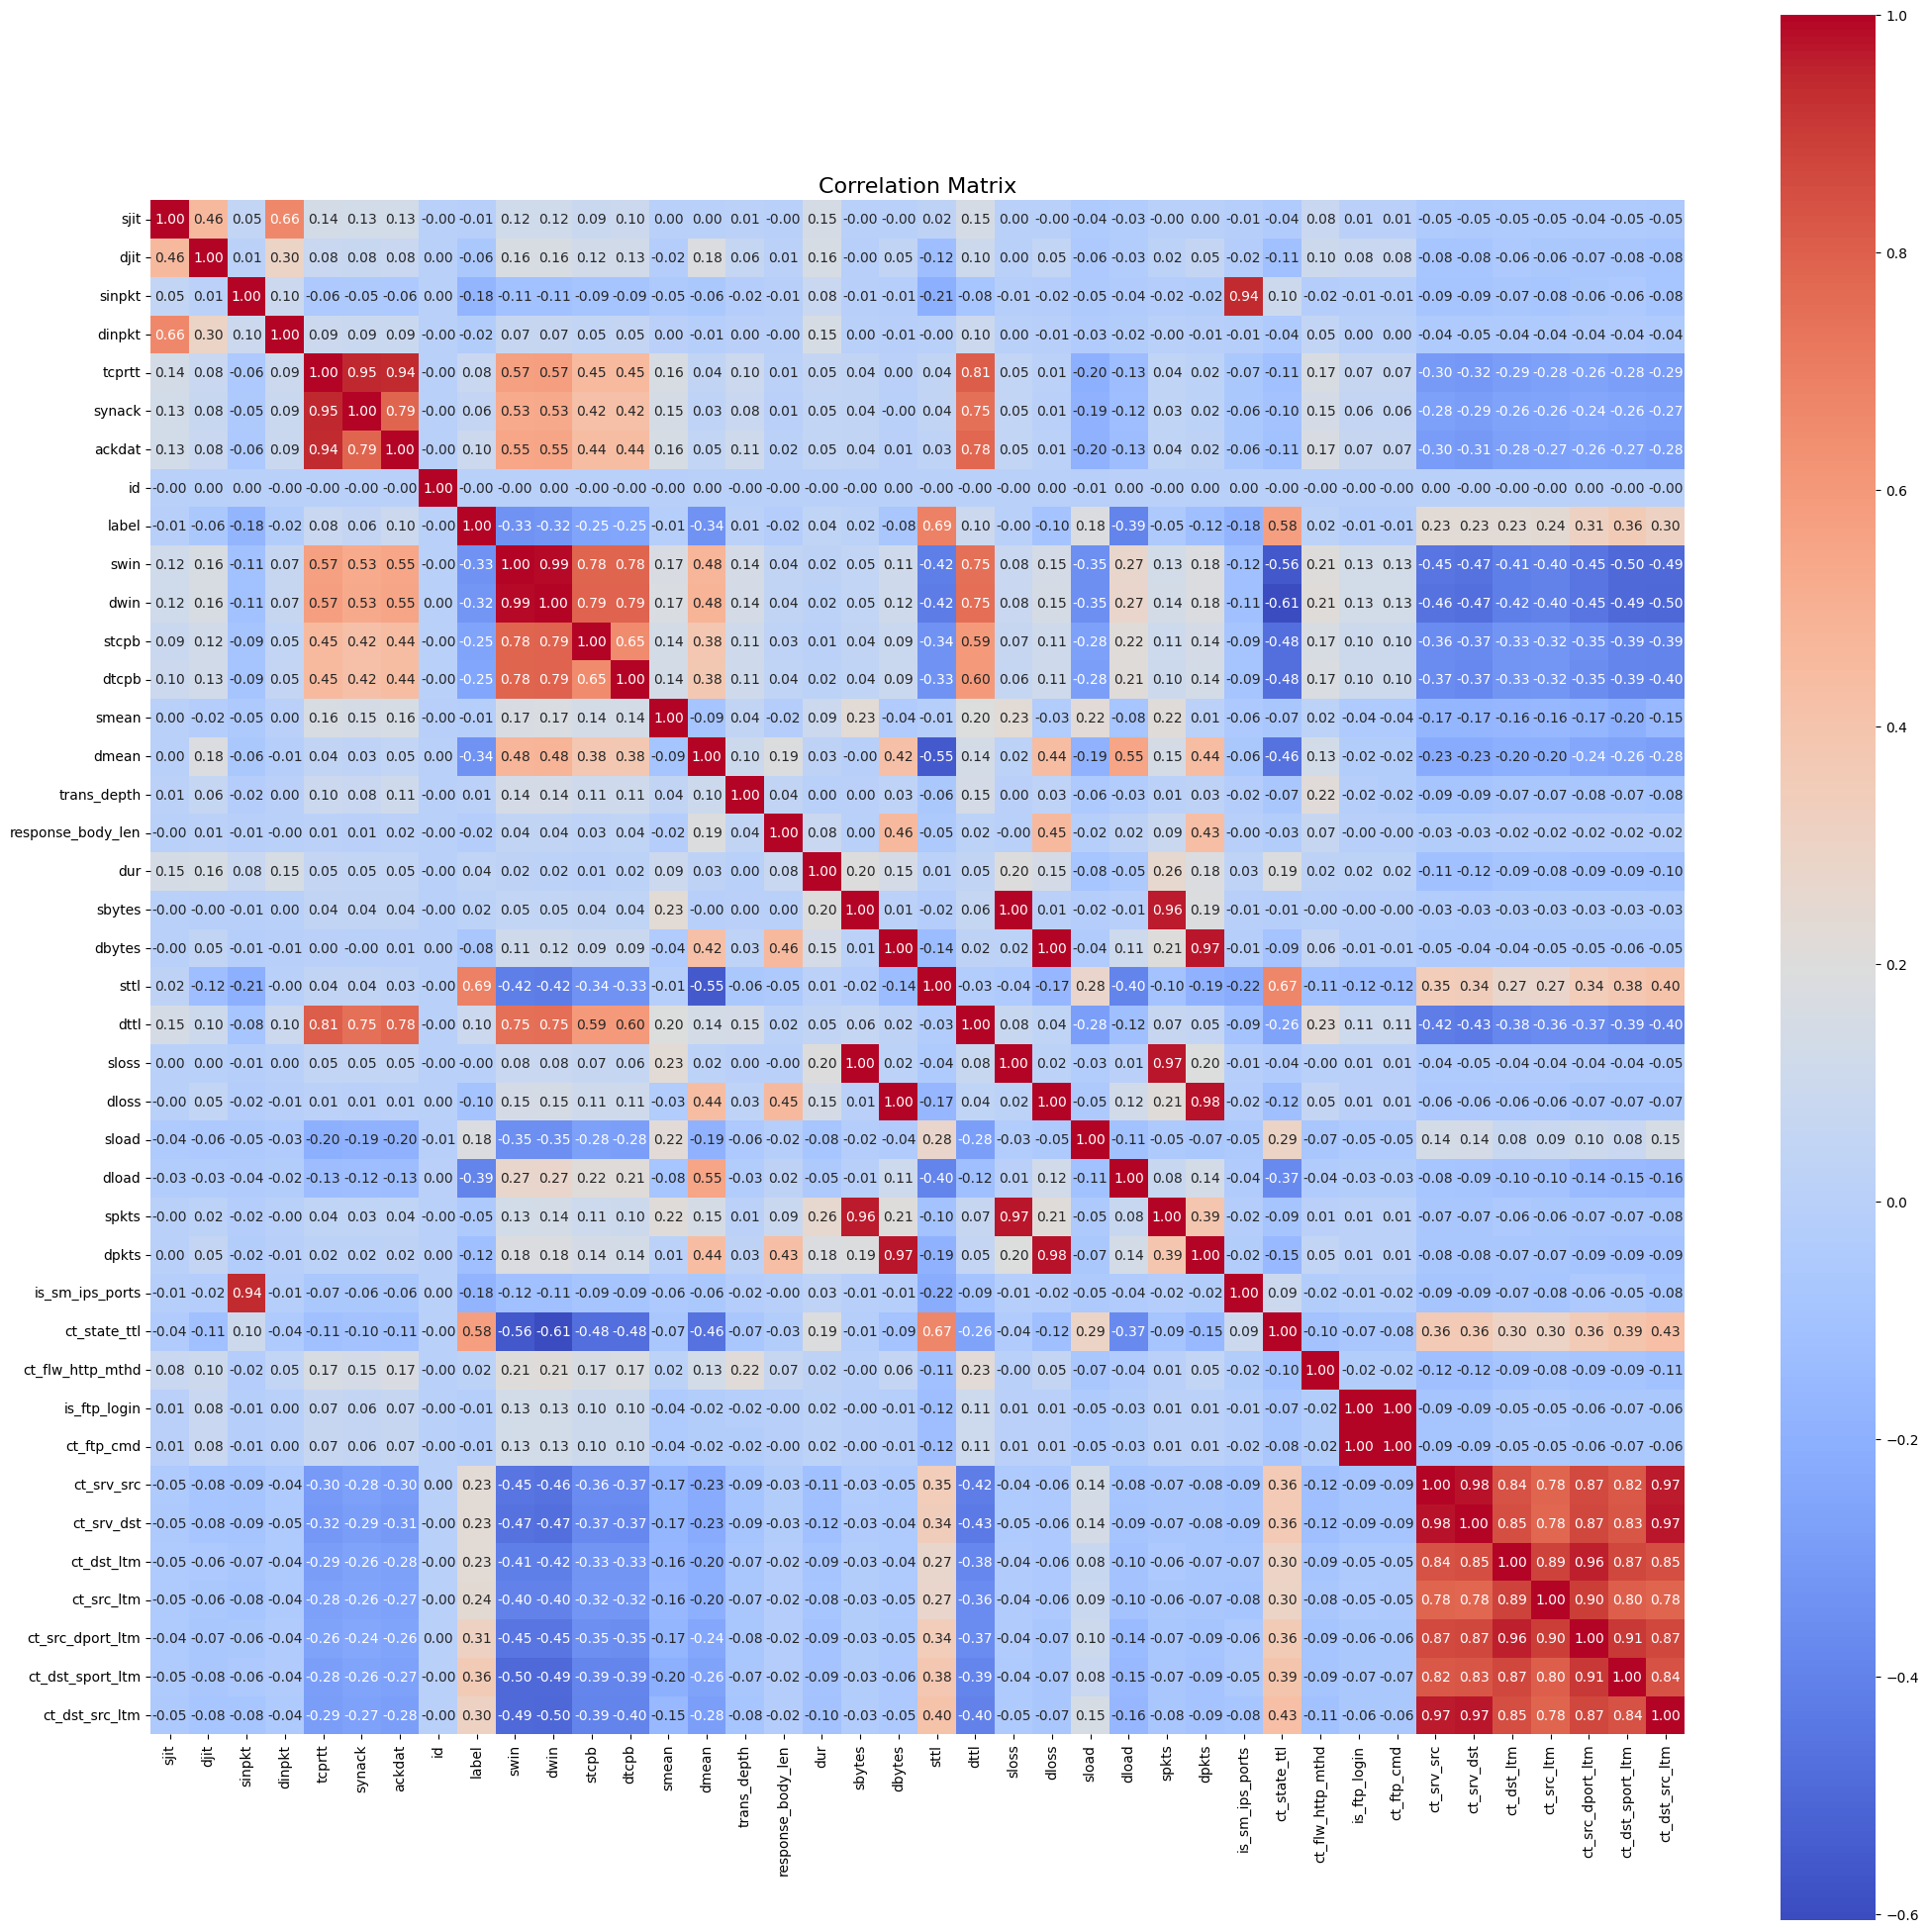

In [231]:
numerical_data = merged_train_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(25, 25))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [232]:
threshold = 0.7  
high_corr_var = set()

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  
            colname = correlation_matrix.columns[i]
            high_corr_var.add(colname)

print("Features yang harus didrop:")
print(high_corr_var)

Features yang harus didrop:
{'synack', 'ct_srv_dst', 'dwin', 'ct_dst_ltm', 'ct_dst_src_ltm', 'sloss', 'ct_ftp_cmd', 'is_sm_ips_ports', 'ct_dst_sport_ltm', 'spkts', 'dttl', 'ackdat', 'ct_src_dport_ltm', 'dtcpb', 'dloss', 'ct_src_ltm', 'dpkts', 'stcpb'}


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [233]:
id_test = merged_test_df['id']
X_test = merged_test_df.drop(columns=['id'], errors='ignore')

X = merged_train_df.drop(columns=['id','label', 'attack_cat'], errors='ignore')
y = merged_train_df['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_val_test_info = {
    "X_train_shape": X_train.shape,
    "y_train_shape": y_train.shape,
    "X_test_shape" : X_test.shape,
    "X_val_shape": X_val.shape,
    "y_val_shape": y_val.shape
}

train_val_test_info

{'X_train_shape': (140272, 41),
 'y_train_shape': (140272,),
 'X_test_shape': (20583, 41),
 'X_val_shape': (35069, 41),
 'y_val_shape': (35069,)}

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [234]:
def handle_missing_values(merged_train_df):
    df = merged_train_df.copy()
    
    highly_skewed_numeric = [
        'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 
        'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 
        'dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'sload', 'dload', 
        'spkts', 'dpkts', 'is_sm_ips_ports', 'ct_flw_http_mthd', 
        'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 
        'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 
        'ct_dst_src_ltm'
    ]
    
    symmetric_numeric = [
        'swin', 'dwin', 'sttl', 'dttl', 'ct_state_ttl'
    ]
    
    categorical_columns = [
        'proto', 'state', 'service'
    ]
    
    median_imputer = SimpleImputer(strategy='median')
    df[highly_skewed_numeric] = median_imputer.fit_transform(df[highly_skewed_numeric])

    mean_imputer = SimpleImputer(strategy='mean')
    df[symmetric_numeric] = mean_imputer.fit_transform(df[symmetric_numeric])
    
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])
    
    return df

X_train_transformed = handle_missing_values(X_train)
X_val_transformed = handle_missing_values(X_val)
X_test_transformed = handle_missing_values(X_test)

print("Cek missing values:")
print(X_train_transformed.isnull().sum())
print(X_val_transformed.isnull().sum())
print(X_train_transformed.shape)

Cek missing values:
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
proto                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
dtype: int64
sjit                 0
d

In [235]:
# def is_unique_len_one(data):
#     for column in data.columns:
#         if len(data[column].unique()) == 1:
#             print(f"Kolom : {column}, Unique Values: {data[column].unique()}")

# is_unique_len_one(X_train_transformed)
# is_unique_len_one(X_val_transformed)

In [236]:
# for col in X_train_transformed.columns:
#     if col in ['proto', 'state', 'service']:
#         print(f"Kolom : {col}, Unique Values: {X_train_transformed[col].unique()}")

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [237]:
def process_and_transform_feature(X, feature, original_df):
    original_skewness = X[feature].skew()
    
    # 1. Imputation (Median)
    imputed_median = X[feature].fillna(original_df[feature].median())
    imputed_median_skewness = imputed_median.skew()
    
    # 2. Clipping
    Q1 = original_df[feature].quantile(0.25)
    Q3 = original_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clipped = X[feature].clip(lower=lower_bound, upper=upper_bound)
    clipped_skewness = clipped.skew()
    
    # 3. Log Transformation
    log_transformed = np.log1p(X[feature])
    log_skewness = log_transformed.skew()
    
    # 4. Square Root Transformation
    sqrt_transformed = np.sqrt(X[feature])
    sqrt_skewness = sqrt_transformed.skew()
    
    methods = {
        'original_skewness': original_skewness,
        'imputed_median_skewness': imputed_median_skewness,
        'clipped_skewness': clipped_skewness,
        'log_skewness': log_skewness,
        'sqrt_skewness': sqrt_skewness
    }

    best_method = min(methods, key=lambda k: abs(methods[k]))

    if best_method == 'original_skewness':
        transformed_feature = X[feature]
    elif best_method == 'imputed_median_skewness':
        transformed_feature = imputed_median
    elif best_method == 'clipped_skewness':
        transformed_feature = clipped
    elif best_method == 'log_skewness':
        transformed_feature = log_transformed
    elif best_method == 'sqrt_skewness':
        transformed_feature = sqrt_transformed
    
    return transformed_feature, best_method

def transform_dataframe(X, features, original_df):
    transformed_X = X.copy()
    best_methods = {}
    
    for feature in features:
        if feature in X.columns:
            transformed_feature, best_method = process_and_transform_feature(X, feature, original_df)
            transformed_X[feature] = transformed_feature
            best_methods[feature] = best_method
    
    return transformed_X, best_methods

columns_to_check = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns if col != 'id']

X_train_transformed, train_best_methods = transform_dataframe(X_train_transformed, columns_to_check, X_train)
X_val_transformed, val_best_methods = transform_dataframe(X_val_transformed, columns_to_check, X_val)
X_test_transformed, test_best_methods = transform_dataframe(X_test_transformed, columns_to_check, merged_test_df)
print(X_train_transformed.shape)
print(X_val_transformed.shape)
print(X_test_transformed.shape)

(140272, 41)
(35069, 41)
(20583, 41)


In [238]:
# for col in X_train_transformed.columns:
#     if col in ['proto', 'state', 'service']:
#         print(f"Kolom : {col}, Unique Values: {X_train_transformed[col].unique()}")

In [239]:
# def check_skewness_after_transformation(df, columns_to_check):
#     skewness_results = {}
#     for feature in columns_to_check:
#         skewness_results[feature] = df[feature].skew()
#         print(f"Feature: {feature} :  {skewness_results[feature]:.6f}")
#     return skewness_results

# print(check_skewness_after_transformation(X_train_transformed, columns_to_check))
# print(check_skewness_after_transformation(X_val_transformed, columns_to_check))
# print(check_skewness_after_transformation(X_test_transformed, columns_to_check))

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [240]:
print("Duplikat X_train_transformed:", X_train_transformed.duplicated().sum())
print("Duplikat X_val_transformed:", X_val_transformed.duplicated().sum())

def remove_duplicates_with_ids(X, y):
    
    duplicated_indices = X.index[X.duplicated(keep='first')].tolist()  
    
    X_clean = X.drop(index=duplicated_indices)
    y_clean = y.drop(index=duplicated_indices)

    return X_clean, y_clean, duplicated_indices

X_train_transformed, y_train_transformed, removed_ids_train = remove_duplicates_with_ids(X_train_transformed, y_train)
X_val_transformed, y_val_transformed, removed_ids_val = remove_duplicates_with_ids(X_val_transformed, y_val)

print("Duplikat X_train_transformed:", X_train_transformed.duplicated().sum())
print("Duplikat X_val_transformed:", X_val_transformed.duplicated().sum())

Duplikat X_train_transformed: 18383
Duplikat X_val_transformed: 2241
Duplikat X_train_transformed: 0
Duplikat X_val_transformed: 0


In [241]:
# print(X_train_transformed.shape)
# print(X_val_transformed.shape)
# print(X_test_transformed.shape)
# print(y_train_transformed.shape)

In [242]:
# for col in X_train_transformed.columns:
#     if col in ['proto', 'state', 'service']:
#         print(f"Kolom : {col}, Unique Values: {X_train_transformed[col].unique()}")

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [243]:
threshold = 0.7  
high_corr_var = set()

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  
            colname = correlation_matrix.columns[i]
            high_corr_var.add(colname)

high_corr_var = list(high_corr_var)

print("Features yang harus didrop:")
print(high_corr_var)

X_train_transformed = X_train_transformed.drop(columns=high_corr_var, errors='ignore')
X_val_transformed = X_val_transformed.drop(columns=high_corr_var, errors='ignore')

X_test = X_test_transformed.drop(columns=[col for col in high_corr_var if col in merged_test_df.columns], errors='ignore')

print("Features sisa X_train_transformed:")
print(X_train_transformed.columns)

print("Features sisa X_val_transformed:")
print(X_val_transformed.columns)

print("features sisa X_test:")
print(X_test.columns)

Features yang harus didrop:
['synack', 'ct_srv_dst', 'dwin', 'ct_dst_ltm', 'ct_dst_src_ltm', 'sloss', 'ct_ftp_cmd', 'is_sm_ips_ports', 'ct_dst_sport_ltm', 'spkts', 'dttl', 'ackdat', 'ct_src_dport_ltm', 'dtcpb', 'dloss', 'ct_src_ltm', 'dpkts', 'stcpb']
Features sisa X_train_transformed:
Index(['sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'proto', 'swin', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'service', 'sload', 'dload', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src'],
      dtype='object')
Features sisa X_val_transformed:
Index(['sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'proto', 'swin', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'service', 'sload', 'dload', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src'],
      dtype='object')
features sisa X_test:
Index(['proto', 'sjit', 'djit', 'sinpkt', 'd

In [244]:
# for col in X_train_transformed.columns:
#     if col in ['proto', 'state', 'service']:
#         print(f"Kolom : {col}, Unique Values: {X_train_transformed[col].unique()}")

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [245]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [246]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, high_outlier_columns=None, low_outlier_columns=None):
        self.high_outlier_columns = high_outlier_columns or []
        self.low_outlier_columns = low_outlier_columns or []
        self.robust_scaler = RobustScaler()
        self.standard_scaler = StandardScaler()
        self.remainder_scaler = StandardScaler()
    
    def fit(self, X, y=None):
        self.remainder_columns = X.drop(
            columns=self.high_outlier_columns + self.low_outlier_columns
        ).select_dtypes(include=['float64', 'int64']).columns

        if self.high_outlier_columns:
            self.robust_scaler.fit(X[self.high_outlier_columns])
        if self.low_outlier_columns:
            self.standard_scaler.fit(X[self.low_outlier_columns])
        if len(self.remainder_columns) > 0:
            self.remainder_scaler.fit(X[self.remainder_columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        if self.high_outlier_columns:
            X_transformed[self.high_outlier_columns] = self.robust_scaler.transform(X[self.high_outlier_columns])
        
        if self.low_outlier_columns:
            X_transformed[self.low_outlier_columns] = self.standard_scaler.transform(X[self.low_outlier_columns])
        
        if len(self.remainder_columns) > 0:
            X_transformed[self.remainder_columns] = self.remainder_scaler.transform(X[self.remainder_columns])
        
        return X_transformed

In [247]:
# print(X_train_transformed.dtypes)

In [248]:
# high_outlier_columns = list(['sinpkt', 'sbytes'])
# low_outlier_columns = list(['djit', 'dinpkt', 'tcprtt', 'ct_srv_src'])

# for col in X_train_transformed.columns:
#     if col in high_outlier_columns + low_outlier_columns: 
#         print(X_train_transformed[col].unique())


# feature_pipeline = Pipeline([
#     ('scaler', CustomScaler(
#         high_outlier_columns=['sinpkt', 'sbytes'], 
#         low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
#     )),
# ])

# X_train_scaled = feature_pipeline.fit_transform(X_train_transformed)


In [249]:
# X_train_scaled 

In [250]:
# numerical_cols = X_train_transformed.select_dtypes(include=['float64', 'int64']).columns

# def detect_outliers(df, columns):
#     outlier_indices = []
    
#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
        
#         outlier_step = 1.5 * IQR
#         lower_bound = Q1 - outlier_step
#         upper_bound = Q3 + outlier_step
        
#         outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
#         print(f"\nOutliers in {column}:")
#         print(f"Number of outliers: {len(outliers)}")
#         print(f"Percentage of outliers: {(len(outliers)/len(df[column])*100):.2f}%")
        
#         outlier_indices.extend(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index)
    
#     return outlier_indices

# detected_outliers = detect_outliers(X_train_transformed, numerical_cols)

In [251]:

# high_outlier = ['sinpkt', 'sbytes']
# low_outlier = ['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
# robust_scaler = RobustScaler()
# standard_scaler = StandardScaler()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('robust', RobustScaler(), high_outlier),   
#         ('standard', StandardScaler(), low_outlier),   
#     ],
#     remainder=StandardScaler()
# )

In [252]:
# for col in X_train_transformed.columns:
#     if col in ['proto', 'state', 'service']:
#         print(f"Kolom : {col}, Unique Values: {X_train_transformed[col].unique()}")

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [253]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, one_hot_columns=None):
        self.one_hot_columns = one_hot_columns or []
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.feature_names_out_ = None

    def fit(self, X, y=None):
        if self.one_hot_columns:
            self.encoder.fit(X[self.one_hot_columns])
            self.feature_names_out_ = self.encoder.get_feature_names_out(self.one_hot_columns)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        if self.one_hot_columns:
            encoded = self.encoder.transform(X[self.one_hot_columns])
            encoded_df = pd.DataFrame(encoded, columns=self.feature_names_out_, index=X.index)
            
            X_transformed = pd.concat([X_transformed.drop(columns=self.one_hot_columns), encoded_df], axis=1)
        
        return X_transformed

In [254]:
# feature_pipeline = Pipeline([
#     ('encoder', FeatureEncoder(one_hot_columns=['proto', 'state', 'service'])),  
#     ('scaler', CustomScaler(
#         high_outlier_columns=['sinpkt', 'sbytes'], 
#         low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
#     )),
# ])


# X_transformed = feature_pipeline.fit_transform(X_train_transformed)

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [255]:

class UnderSampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', random_state=None):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.sampler = RandomUnderSampler(sampling_strategy=self.sampling_strategy, random_state=self.random_state)

    def fit(self, X, y):
        self.sampler.fit_resample(X, y)
        return self

    def transform(self, X, y=None):
        if y is None:
            raise ValueError("`y` kok gak masuk , woilah cik.")
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled, y_resampled

In [256]:
# class_counts = Counter(y_train)
# min_class_count = min(class_counts.values())

# sampling_strategy = {k: int(min_class_count * 1) for k in class_counts.keys()}

# print("Sampling strategy:", sampling_strategy)

# feature_pipeline = Pipeline([
#     ('encoder', FeatureEncoder(one_hot_columns=['proto', 'state', 'service'])),  # Encoding
#     ('scaler', CustomScaler(
#         high_outlier_columns=['sinpkt', 'sbytes'], 
#         low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
#     )),  
#     ('undersampler', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42))  # Undersampling
# ])

# X_resampled, y_resampled = feature_pipeline.fit_resample(X_train_transformed, y_train)

# print("Distribusi sebelum resampling:")
# print(Counter(y_train))

# print("\nDistribusi setelah resampling:")
# print(Counter(y_resampled))

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [257]:
class DataNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, method='minmax'):
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        if self.method == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.method == 'zscore':
            self.scaler = StandardScaler()
        elif self.method == 'robust':
            self.scaler = RobustScaler()
        else:
            raise ValueError(f"Method '{self.method}' tidak valid.")

        self.scaler.fit(X)
        return self

    def transform(self, X):
        if self.scaler is None:
            raise ValueError("Scaler belum dilatih. Panggil fit() terlebih dahulu.")
        return self.scaler.transform(X)

In [258]:
# feature_pipeline = Pipeline([
#     ('encoder', FeatureEncoder(one_hot_columns=['proto', 'state', 'service'])),  # Encoding
#     ('scaler', CustomScaler(
#         high_outlier_columns=['sinpkt', 'sbytes'], 
#         low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
#     )),  # Scaling
#     ('normalizer', DataNormalizer(method='zscore')),  # Normalisasi menggunakan Z-score
#     ('undersampler', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42))  # Undersampling
# ])

# X_resampled, y_resampled = feature_pipeline.fit_resample(X_train_transformed, y_train)

# print(X_resampled)

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [259]:
class PCAReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = None

    def fit(self, X, y=None):
        self.pca = PCA(n_components=self.n_components)
        self.pca.fit(X)
        return self

    def transform(self, X):
        if self.pca is None:
            raise ValueError("PCA belum dilatih. Panggil fit() dulu.")
        return self.pca.transform(X)

    def explained_variance_ratio(self):
        if self.pca is None:
            raise ValueError("PCA belum dilati.")
        return self.pca.explained_variance_ratio_

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [260]:
class_counts = Counter(y_train_transformed)
min_class_count = min(class_counts.values())

sampling_strategy = {k: int(min_class_count * 1) for k in class_counts.keys()}

print("Sampling strategy:", sampling_strategy)

feature_pipeline = Pipeline([
    ('encoder', FeatureEncoder(one_hot_columns=['proto', 'state', 'service'])),
    ('scaler', CustomScaler(
        high_outlier_columns=['sinpkt', 'sbytes'], 
        low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
    )), 
    ('normalizer', DataNormalizer(method='zscore')), 
    ('pca', PCAReducer(n_components=15)), 
    ('undersampler', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42))  
])


valtest_pipeline = Pipeline([
    ('encoder', FeatureEncoder(one_hot_columns=['proto', 'state', 'service'])),  
    ('scaler', CustomScaler(
        high_outlier_columns=['sinpkt', 'sbytes'], 
        low_outlier_columns=['djit', 'dinpkt', 'tcprtt', 'ct_srv_src']
    )), 
    ('normalizer', DataNormalizer(method='zscore')),  
    ('pca', PCAReducer(n_components=15)), 
])



X_train_resampled, y_train_resampled = feature_pipeline.fit_resample(X_train_transformed, y_train_transformed)

X_val_transformed = valtest_pipeline.fit_transform(X_val_transformed)
X_test_transformed = valtest_pipeline.fit_transform(X_test_transformed)

print("Dimensi X_train setelah resampling:", X_train_resampled.shape)
print("Dimensi y_train setelah resampling:", y_train_resampled.shape)
print("Dimensi X_val setelah transformasi:", X_val_transformed.shape)
print("Dimensi X_test setelah transformasi:", X_test_transformed.shape)

Sampling strategy: {'Generic': 104, 'DoS': 104, 'Fuzzers': 104, 'Exploits': 104, 'Normal': 104, 'Reconnaissance': 104, 'Analysis': 104, 'Backdoor': 104, 'Shellcode': 104, 'Worms': 104}


c:\ITB\A Perkuliahan ITB\Mata Kuliah\Semester 5\AI\tubes4\Tubes-AI-2\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ITB\A Perkuliahan ITB\Mata Kuliah\Semester 5\AI\tubes4\Tubes-AI-2\.venv\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\ITB\A Perkuliahan ITB\Mata Kuliah\Semester 5\AI\tubes4\Tubes-AI-2\.venv\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Dimensi X_train setelah resampling: (1040, 15)
Dimensi y_train setelah resampling: (1040,)
Dimensi X_val setelah transformasi: (32828, 15)
Dimensi X_test setelah transformasi: (20583, 15)


In [261]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# pca = PCA()
# pca.fit(X_train_resampled)

# cumulative_variance = pca.explained_variance_ratio_.cumsum()

# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
# plt.axhline(y=0.80, color='r', linestyle='--')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

or create your own here

In [262]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [263]:
from KNN import KNNScratch

In [264]:
k_neighbors = 3 
knn_model = KNNScratch(k_neighbours=k_neighbors, distance_type='euclidean')
knn_model.fit(X_train_resampled, y_train_resampled)

y_pred_scratch = knn_model.predict(X_val_transformed)

knn_model.save_model("knn_model.pkl")

[DEBUG] Predicting sample 0
[DEBUG] Predicting sample 1
[DEBUG] Predicting sample 2
[DEBUG] Predicting sample 3
[DEBUG] Predicting sample 4
[DEBUG] Predicting sample 5
[DEBUG] Predicting sample 6
[DEBUG] Predicting sample 7
[DEBUG] Predicting sample 8
[DEBUG] Predicting sample 9
[DEBUG] Predicting sample 10
[DEBUG] Predicting sample 11
[DEBUG] Predicting sample 12
[DEBUG] Predicting sample 13
[DEBUG] Predicting sample 14
[DEBUG] Predicting sample 15
[DEBUG] Predicting sample 16
[DEBUG] Predicting sample 17
[DEBUG] Predicting sample 18
[DEBUG] Predicting sample 19
[DEBUG] Predicting sample 20
[DEBUG] Predicting sample 21
[DEBUG] Predicting sample 22
[DEBUG] Predicting sample 23
[DEBUG] Predicting sample 24
[DEBUG] Predicting sample 25
[DEBUG] Predicting sample 26
[DEBUG] Predicting sample 27
[DEBUG] Predicting sample 28
[DEBUG] Predicting sample 29
[DEBUG] Predicting sample 30
[DEBUG] Predicting sample 31
[DEBUG] Predicting sample 32
[DEBUG] Predicting sample 33
[DEBUG] Predicting sampl

In [265]:
knn_lib = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_lib.fit(X_train_resampled, y_train_resampled)
y_pred_lib = knn_lib.predict(X_val_transformed)

In [266]:
f1_scratch = f1_score(y_val_transformed, y_pred_scratch, average='macro')
f1_lib = f1_score(y_val_transformed, y_pred_lib, average='macro')

print(X_val_transformed.shape)
print(y_val_transformed.shape)
print(y_pred_scratch.shape)

print("F1-Score Macro Average (Scratch):", f1_scratch)
print("F1-Score Macro Average (Library):", f1_lib)

(32828, 15)
(32828,)
(32828,)
F1-Score Macro Average (Scratch): 0.34705096153860965
F1-Score Macro Average (Library): 0.3671453453963325


In [268]:
loaded_knn_model = KNNScratch.load_model("knn_model.pkl")

y_pred_load = loaded_knn_model.predict(X_val_transformed)
f1_load = f1_score(y_val_transformed, y_pred_load, average='macro')
print("F1-Score Macro Average (Load):", f1_load)

[DEBUG] Predicting sample 0
[DEBUG] Predicting sample 1
[DEBUG] Predicting sample 2
[DEBUG] Predicting sample 3
[DEBUG] Predicting sample 4
[DEBUG] Predicting sample 5
[DEBUG] Predicting sample 6
[DEBUG] Predicting sample 7
[DEBUG] Predicting sample 8
[DEBUG] Predicting sample 9
[DEBUG] Predicting sample 10
[DEBUG] Predicting sample 11
[DEBUG] Predicting sample 12
[DEBUG] Predicting sample 13
[DEBUG] Predicting sample 14
[DEBUG] Predicting sample 15
[DEBUG] Predicting sample 16
[DEBUG] Predicting sample 17
[DEBUG] Predicting sample 18
[DEBUG] Predicting sample 19
[DEBUG] Predicting sample 20
[DEBUG] Predicting sample 21
[DEBUG] Predicting sample 22
[DEBUG] Predicting sample 23
[DEBUG] Predicting sample 24
[DEBUG] Predicting sample 25
[DEBUG] Predicting sample 26
[DEBUG] Predicting sample 27
[DEBUG] Predicting sample 28
[DEBUG] Predicting sample 29
[DEBUG] Predicting sample 30
[DEBUG] Predicting sample 31
[DEBUG] Predicting sample 32
[DEBUG] Predicting sample 33
[DEBUG] Predicting sampl

## B. Naive Bayes

In [207]:
from nbscratch import NaiveBayesFromScratch

In [208]:
nb_scratch = NaiveBayesFromScratch()

nb_scratch.fit(X_train_resampled, y_train_resampled)

nb_scratch.save_model("naive_bayes_scratch.pkl")

y_pred_scratch = nb_scratch.predict(X_val_transformed)

f1_val_scratch = f1_score(y_val_transformed, y_pred_scratch, average='macro')

In [209]:
nb_lib = GaussianNB()  
nb_lib.fit(X_train_resampled, y_train_resampled)  
y_pred_lib = nb_lib.predict(X_val_transformed)  

f1_val_lib = f1_score(y_val_transformed, y_pred_lib, average='macro')

In [210]:
print("F1-Score Macro Average (Scratch):", f1_val_scratch)
print("F1-Score Macro Average (Library):", f1_val_lib)

F1-Score Macro Average (Scratch): 0.2599162594937131
F1-Score Macro Average (Library): 0.2595194803877786


In [211]:
loaded_nb_model = NaiveBayesFromScratch.load_model("naive_bayes_scratch.pkl")

y_pred_load = loaded_nb_model.predict(X_val_transformed)
f1_val_load = f1_score(y_val_transformed, y_pred_load, average='macro')

print("F1-Score Macro Average (Load):", f1_val_load)

F1-Score Macro Average (Load): 0.2599162594937131


## C. ID3

In [188]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [189]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [190]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`